In [1]:
%matplotlib notebook
%matplotlib notebook
import matplotlib
matplotlib.use('Qt4Agg',warn=False, force=True)
import matplotlib.pyplot as plt
from imexam.imexamine import Imexamine as im
import imexam
import numpy as np
import pandas as pd
import os
import sys
from astropy.io import fits
#os.environ['XPA_METHOD'] = "local"
os.environ['XPA_METHOD'] = "inet"


In [2]:
%matplotlib notebook
%matplotlib notebook

def openImage(ds9, pgNum, ccdNum, imageType, filePath='/home/hayden/Documents/Dirac/Data/'):
    """
    Open an image in ds9 with imexam and zoom to the first object in the object_location.txt file
    
    Inputs:
        pgNum - Pointing group number. e.g. 302
        ccdNum - DECam CCD number. e.g. 15
        imageType (str) - 'calexp' or 'imdiff'
    """
    # Read in the list of objects from the objects.txt file
    ol = pd.read_csv(filePath+'objects.txt','\t') #Object list

    # Cut the object location dataframe to the Pointing Group and CCD in question
    ccd_cut = ol.loc[(ol['field']==pgNum) & (ol['ccd']==ccdNum)]
    ccd = ccd_cut.reset_index() # Reset the index of the new dataframe so [0] is the first value
    imageType = imageType.lower() # Set imageType string to lowercase for compatibility
    # Generate file name and path
    filename = filePath+'{}/{}/{:02d}/{}.fits'.format(imageType,pgNum,ccdNum,ccd['visit_id'][0])
    # Open fits header to get magzero value needed for imexam photometry
    hdulist = fits.open(filename)
    try:
        magzero = hdulist[0].header['MAGZERO']
    except:
        print('Could not find MagZero. Assigning default value')
        magzero=30.02 # Most common magzero for DECam data
    # Connect imexam to a ds9 window. There must be exactly one ds9 window already open.
    
    # Set aperature parameters
    ds9 = setAperParams(ds9,magzero)
    # Set a couple region statistic parameters
    ds9.set_plot_pars('m', "region_size", 20) # Set box side length in pixels
    ds9.set_plot_pars('m', "stat", "describe") # Use the scipy describe function
    
    ds9.load_fits(filename) # Load the file
    ds9.scale() # Set scale
    # Create a region around the object (mostly for convenience)
    ds9.set_region('circle {} {} {}'.format(ccd['x_pixel'][0],ccd['y_pixel'][0],10))
    # Pan and zoom to the object in question
    ds9.panto_image(ccd['x_pixel'][0],ccd['y_pixel'][0])
    ds9.zoom(3)
    # Delete old plots and generate a new filename for upcoming plots
    plotName = imageType+'_{}_{}.pdf'.format(pgNum, ccdNum)
    try:
        os.remove(plotName)
    except:
        print('No File to delete')
    # ds9.plotname() will fail if there is already a file with that name there, unless using
    # the default filename.
    ds9.plotname(plotName)
    return(ds9)

def setAperParams(ds9,magzero,radius=15):
    """
    Set the parameters for aperture photometry.
    More conveninent than using many one-line commands.
    Defaults can be found at: https://imexam.readthedocs.io/en/latest/imexam/imexam_command.html
    """
    ds9.exam.aper_phot_pars= {'function':["aperphot",],
                'center':[True,"Center the object location using a Gaussian2D fit"],
                'width':[5,"Width of sky annulus in pixels"],
                'subsky':[True,"Subtract a sky background?"],
                'skyrad':[15,"Distance to start sky annulus is pixels"],
                'radius':[radius,"Radius of aperture for star flux"],
                'zmag':[magzero,"zeropoint for the magnitude calculation"],
                'genplot': [True, 'Plot the apertures'],
                'title': [None, 'Title of the plot'],
                'scale': ['zscale', 'How to scale the image'],
                'color_min': [None, 'Minimum color value'],
                'color_max': [None, 'Maximum color value'],
                'cmap': ['Greys', 'Matplotlib colormap to use']
                }
    return(ds9)



In [3]:
# Connect to an open DS9 Window (Only need to do this once)
ds9 = imexam.connect('ds9',wait_time=60)
# Set the log file to output the results of aperture photometry
# This CAN only be set once, or else there will be an error
ds9.setlog('imexam.log')


Saving imexam commands to 'imexam.log'


Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/302/05/435500.fits
xc=1722.572578	yc=2828.571285
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


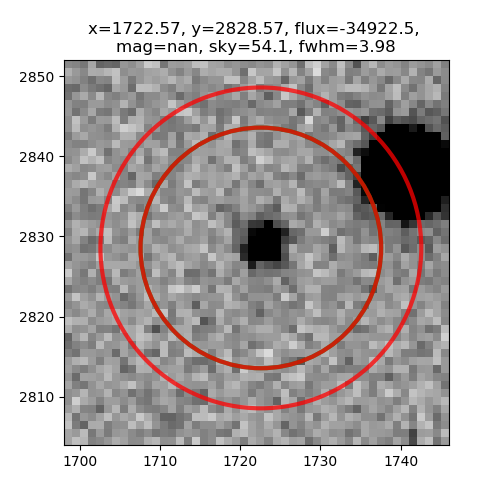

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/302/05/435500.fits
xc=1722.471469	yc=2828.646776
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


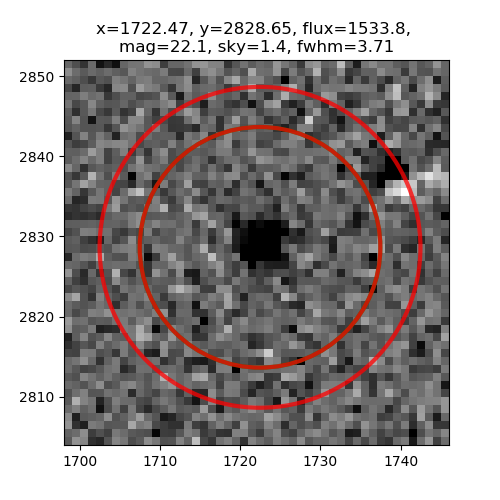

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/302/15/433934.fits
xc=1012.316174	yc=2921.541122
x              y              radius         flux           mag(zpt=30.02) sky/pix        fwhm(pix)
1012.32   

<IPython.core.display.Javascript object>


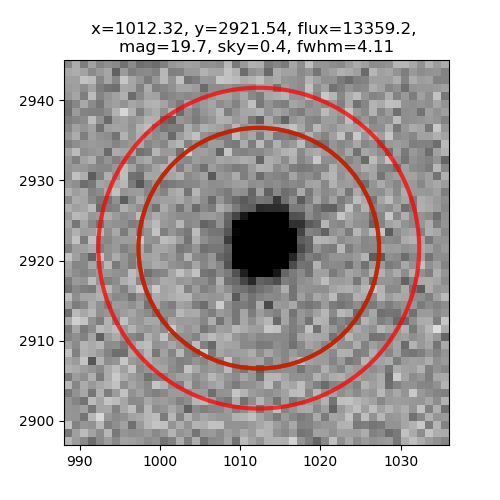

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/302/15/433934.fits
xc=1012.299237	yc=2921.572690
x              y              radius         flux           mag(zpt=30.02) sky/pix        fwhm(pix)
1012.30   

<IPython.core.display.Javascript object>


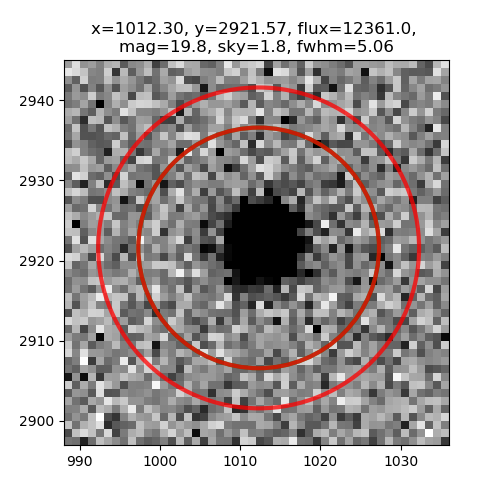

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/302/37/434612.fits
xc=260.308017	yc=3582.406553
x              y              radius         flux           mag

<IPython.core.display.Javascript object>


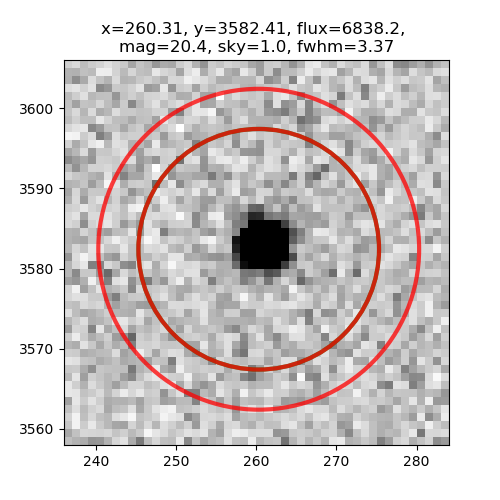

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/302/37/434612.fits
xc=260.335223	yc=3582.540086
x              y              radius         flux           mag

<IPython.core.display.Javascript object>


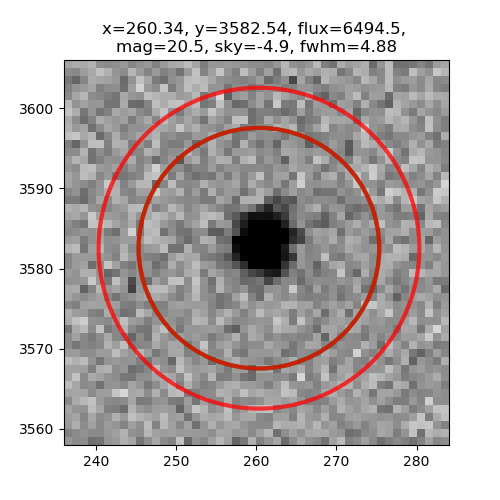

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/302/38/433934.fits
xc=990.416289	yc=952.346282
x              y              radius         flux           mag(zpt=30.02) sky/pix        fwhm(pix)
990.42      

<IPython.core.display.Javascript object>


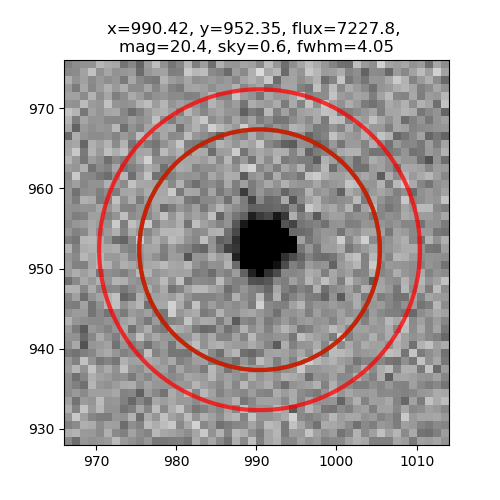

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/302/38/433934.fits
xc=990.406042	yc=952.375314
x              y              radius         flux           mag(zpt=30.02) sky/pix        fwhm(pix)
990.41      

<IPython.core.display.Javascript object>


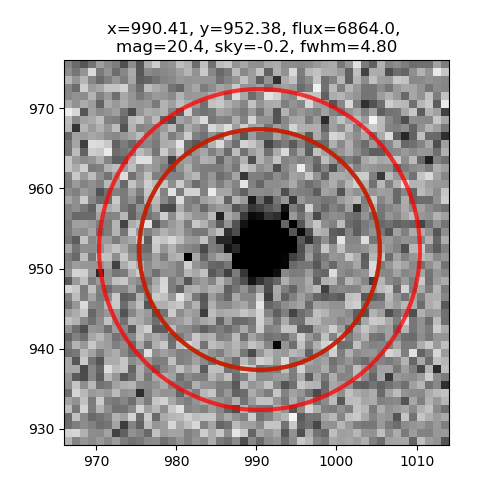

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/302/44/433934.fits
xc=1803.298632	yc=2880.642237
x              y              radius         flux           mag(zpt=30.02) sky/pix        fwhm(pix)
1803.30   

<IPython.core.display.Javascript object>


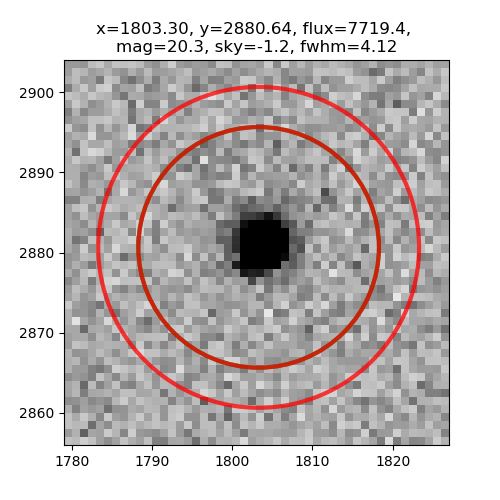

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/302/44/433934.fits
xc=1803.317595	yc=2880.751447
x              y              radius         flux           mag(zpt=30.02) sky/pix        fwhm(pix)
1803.32   

<IPython.core.display.Javascript object>


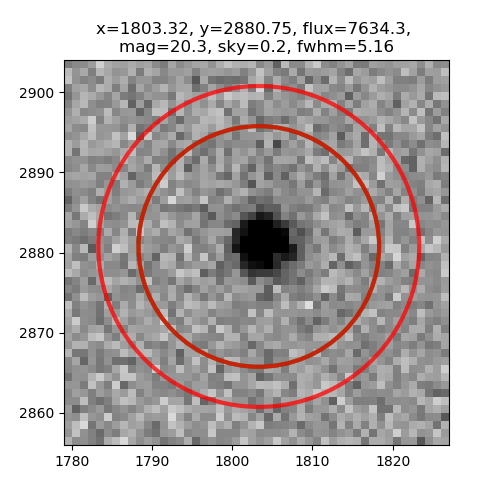

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/11/433933.fits
xc=1335.320149	yc=1394.535407
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
1335.32   

<IPython.core.display.Javascript object>


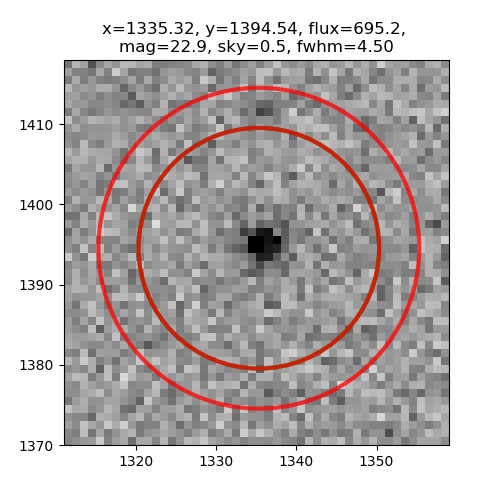

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/11/433933.fits
xc=1335.511971	yc=1394.589989
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
1335.51   

<IPython.core.display.Javascript object>


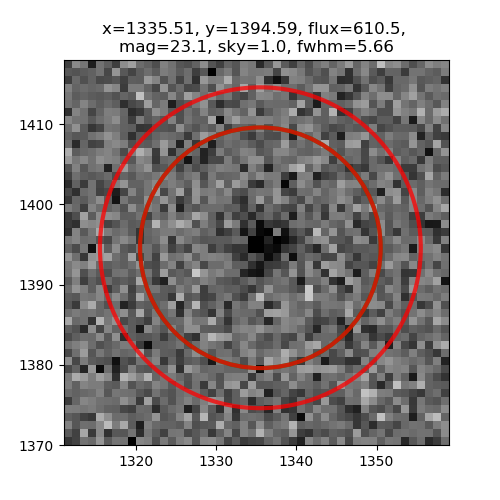

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/15/435499.fits
xc=1300.724257	yc=2256.827828
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


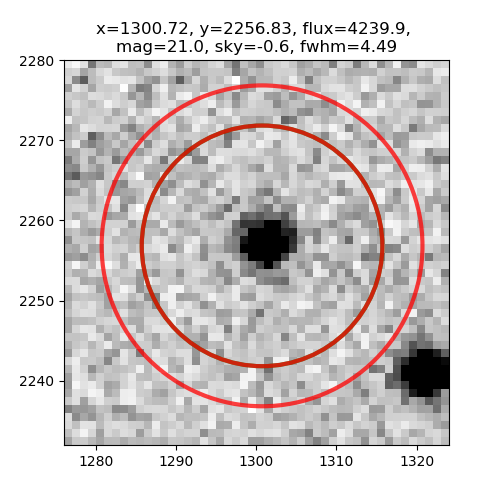

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/15/435499.fits
xc=1300.627204	yc=2256.833178
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


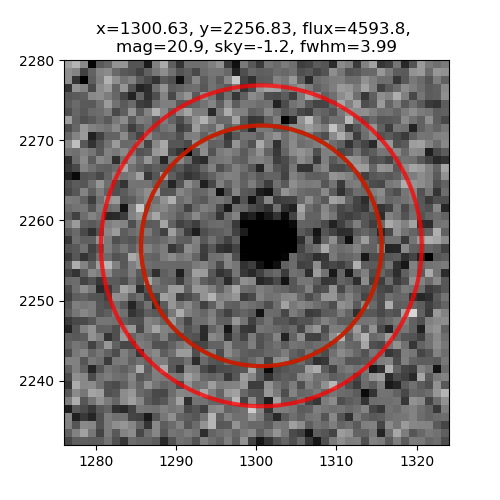

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/22/433933.fits
xc=1118.736320	yc=2276.605637
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
1118.74   

<IPython.core.display.Javascript object>


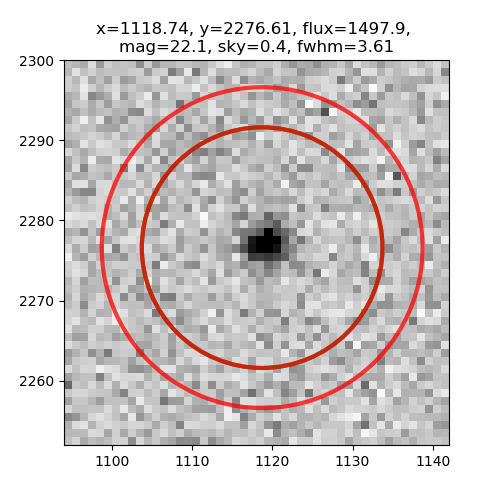

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/22/433933.fits
xc=1118.817596	yc=2276.778294
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
1118.82   

<IPython.core.display.Javascript object>


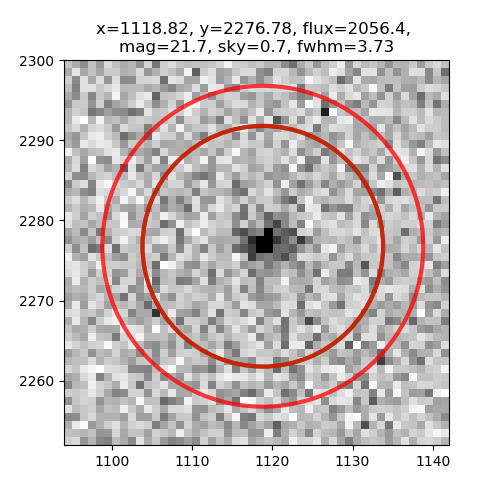

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/30/435499.fits
xc=1042.423784	yc=2399.398801
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


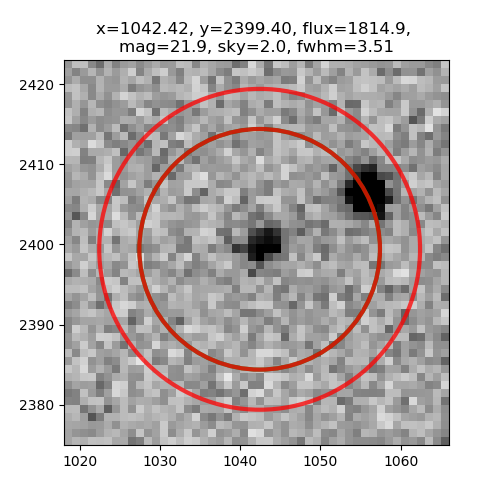

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/30/435499.fits
xc=1042.413287	yc=2399.271469
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


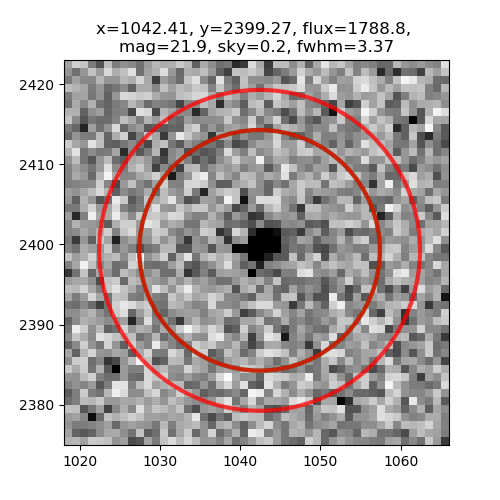

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/36/435499.fits
xc=1862.518387	yc=1595.240593
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


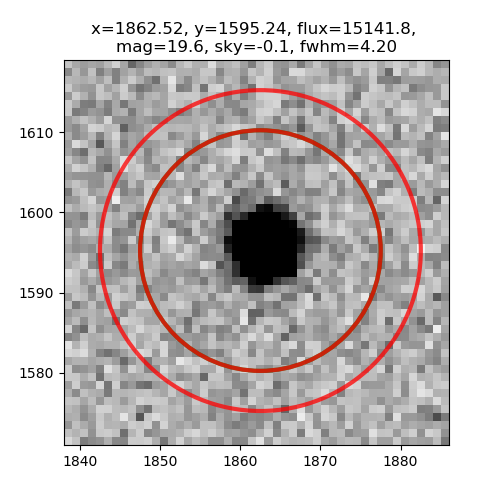

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/36/435499.fits
xc=1862.535861	yc=1595.234992
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


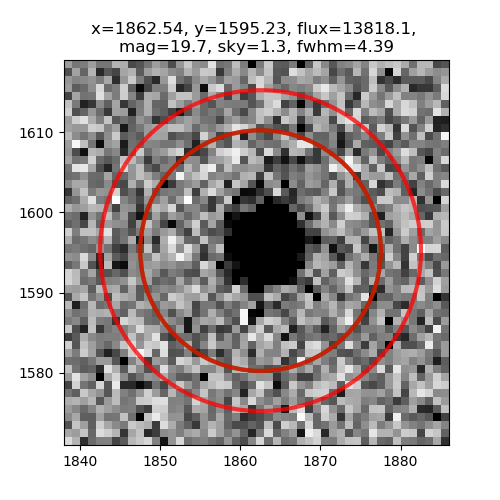

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/37/435499.fits
xc=1926.123358	yc=3028.319540
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


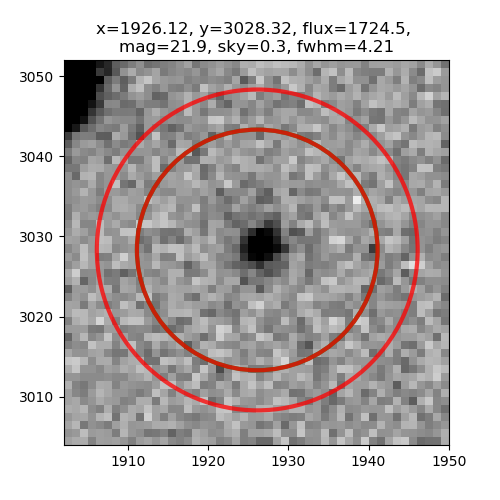

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/37/435499.fits
xc=1926.187026	yc=3028.236772
x              y              radius         flux           ma

<IPython.core.display.Javascript object>


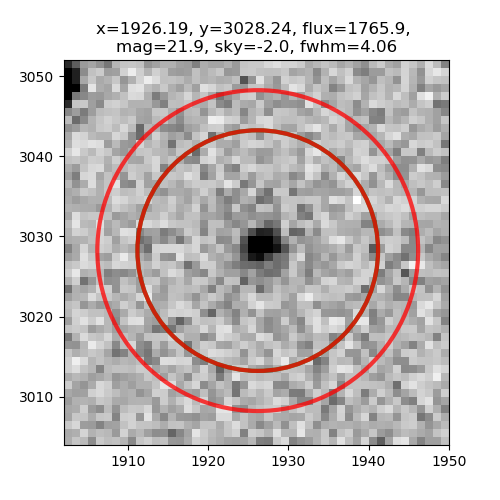

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/38/433933.fits
xc=417.222368	yc=3013.046608
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
417.22     

<IPython.core.display.Javascript object>


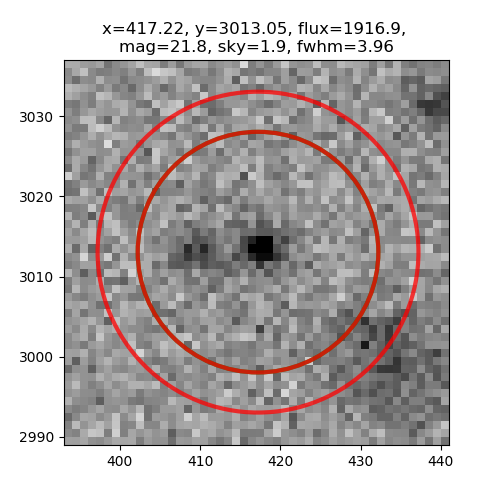

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/38/433933.fits
xc=417.167715	yc=3013.022505
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
417.17     

<IPython.core.display.Javascript object>


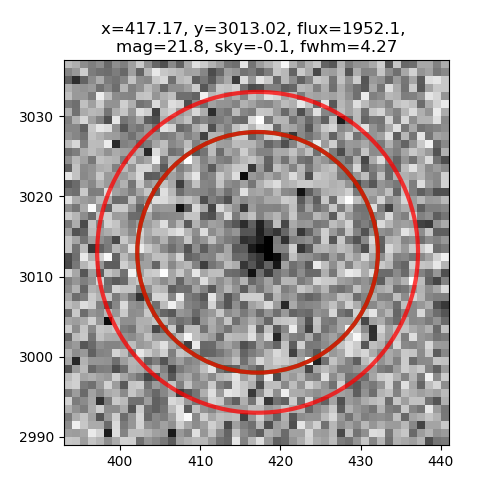

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/43/434611.fits
xc=643.431037	yc=2880.602635
x              y              radius         flux           mag

<IPython.core.display.Javascript object>


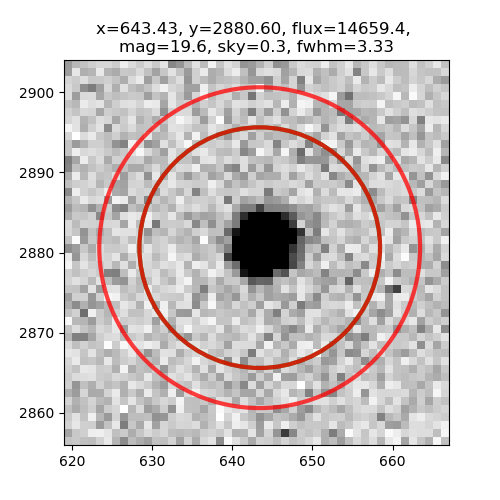

Could not find MagZero. Assigning default value
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/301/43/434611.fits
xc=643.481529	yc=2880.609719
x              y              radius         flux           mag

<IPython.core.display.Javascript object>


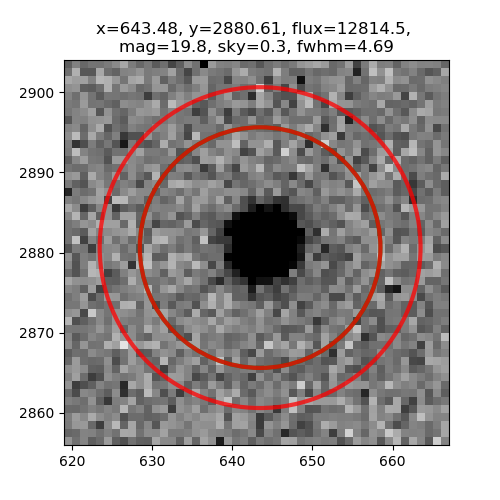

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/calexp/301/44/433933.fits
set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in

<IPython.core.display.Javascript object>


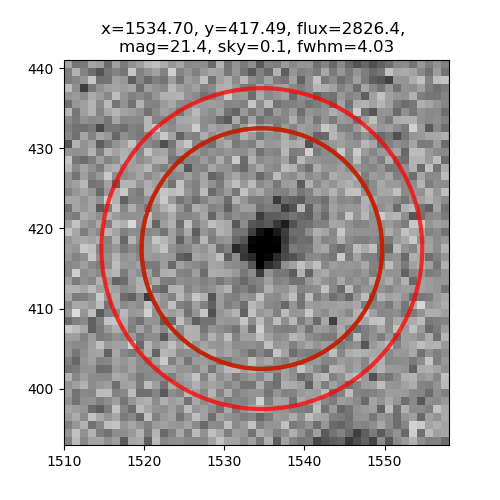

set report_stat_pars: region_size to 20
set report_stat_pars: stat to describe
No File to delete

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /home/hayden/Documents/Dirac/Data/imdiff/300/04/433932.fits
xc=1534.649964	yc=417.246357
x              y              radius         flux           mag(zpt=30.03) sky/pix        fwhm(pix)
1534.65    

<IPython.core.display.Javascript object>


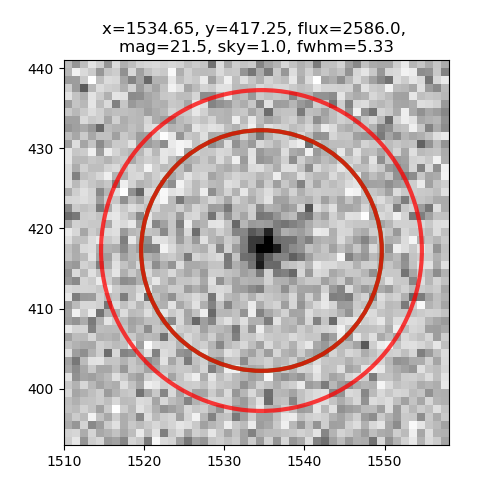

In [4]:
ol = pd.read_csv('/home/hayden/Documents/Dirac/Data/objects.txt','\t') #Object list
j=0 # Index of the next ccd in the pandas ol data frame
field = ol['field'][j] # Initialize field
ccdnum = ol['ccd'][j] # Initialize ccd number

# Now loop over all the ccds and fields, selecting only the first moving object in each
# Stop the while loop once we reach the final ccd in field 300
while (field!=300)&(ccdnum!=57):
    field = ol['field'][j] # Update field
    ccdnum = ol['ccd'][j] # Update ccdnum
    # Open the calexp file
    ds9=openImage(ds9,field,ccdnum,'calexp')
    ds9.imexam() # Interact with the calexp
    # Open the imdiff file
    ds9=openImage(ds9,field,ccdnum,'imdiff')
    ds9.imexam() # Interact with the imdiff
    # Find the next ccd
    ccd = ol.loc[(ol['field']==field) & (ol['ccd']==ccdnum)]
    j=ccd.index[-1]+1 # Update the index for the next ccd

In [4]:
# Open the imexam log generated by the above cell
data=[]
with open('imexam_data.log', 'r') as f:
    for count, line in enumerate(f, start=1):
        if count % 7 == 0: # Only read the 7th line, as this is where the flux data is stored
            data.append((line))
data = np.loadtxt(data)

<IPython.core.display.Javascript object>


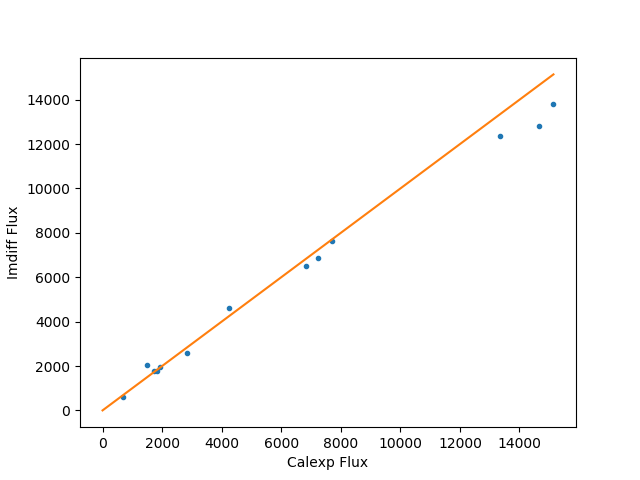

<IPython.core.display.Javascript object>


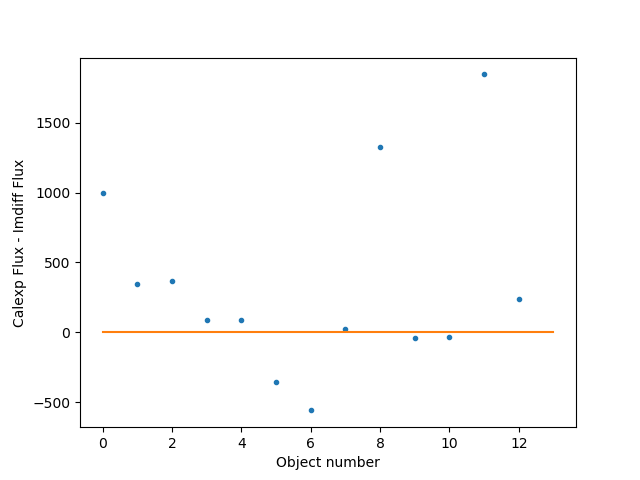

In [9]:
# Cut the flux values from the larger data array
flux = []
_=[flux.append(d[3]) for d in data]
calexp_flux = np.array(flux[0::2]) # Calexp fluxes will be even indexes
imdiff_flux = np.array(flux[1::2]) # Imdiff fluxes will be odd indexes

# Plot calexp vs imdiff fluxes
plt.figure()
plt.plot(calexp_flux[1:],imdiff_flux[1:],'.')
x = np.linspace(0,np.max(calexp_flux),1000)
plt.plot(x,x)
plt.xlabel('Calexp Flux')
plt.ylabel('Imdiff Flux')
plt.savefig('FluxVsFlux.pdf')

# Plot calexp and imdiff flux residuals
plt.figure()
plt.plot(calexp_flux[1:]-imdiff_flux[1:],'.')
plt.ylabel('Calexp Flux - Imdiff Flux')
plt.xlabel('Object number')
y = np.zeros(14)
plt.plot(y)
plt.savefig('FluxResidual.pdf')